In [1]:
#import all the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
dataset = pd.read_csv('train_set.csv',index_col="Date",parse_dates=True)

In [3]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [4]:
dataset.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-01-02 to 2017-12-29
Data columns (total 6 columns):
Open         1259 non-null float64
High         1259 non-null float64
Low          1259 non-null float64
Close        1259 non-null float64
Adj Close    1259 non-null float64
Volume       1259 non-null int64
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


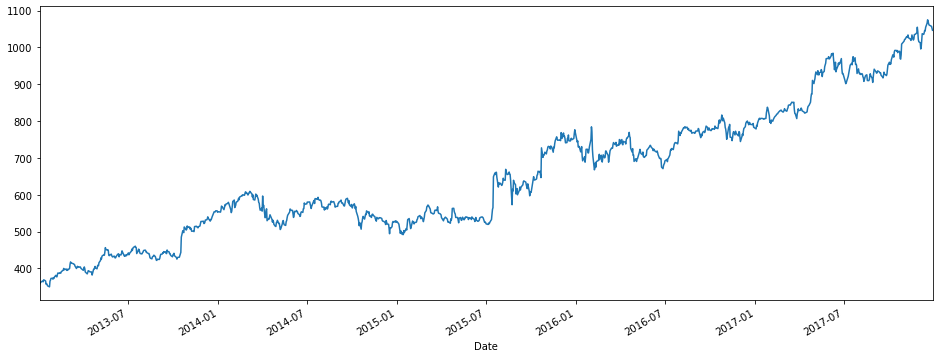

In [6]:
dataset['Open'].plot(figsize=(16,6))

In [7]:
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-10,363.335427,366.149266,360.658552,364.240962,364.240962,4.260343e+06
2013-01-11,364.937862,367.244285,362.060150,365.428951,365.428951,3.899129e+06
2013-01-14,365.794434,367.973114,362.175829,365.399144,365.399144,4.056057e+06


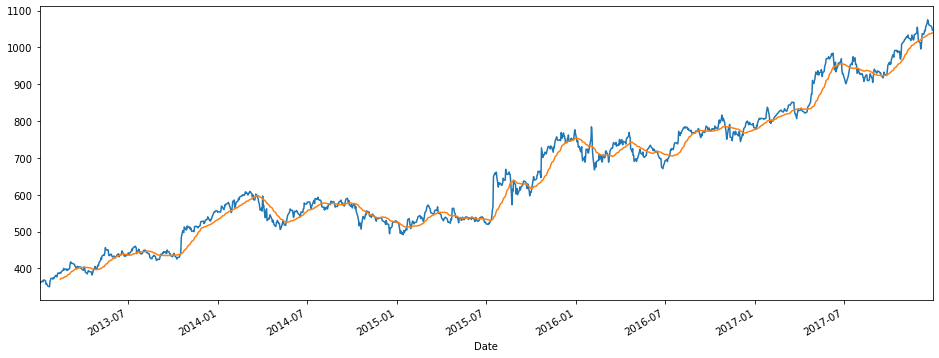

In [8]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

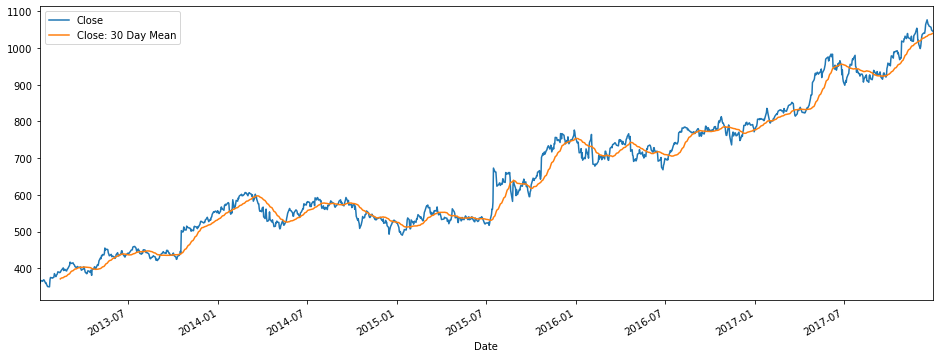

In [9]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

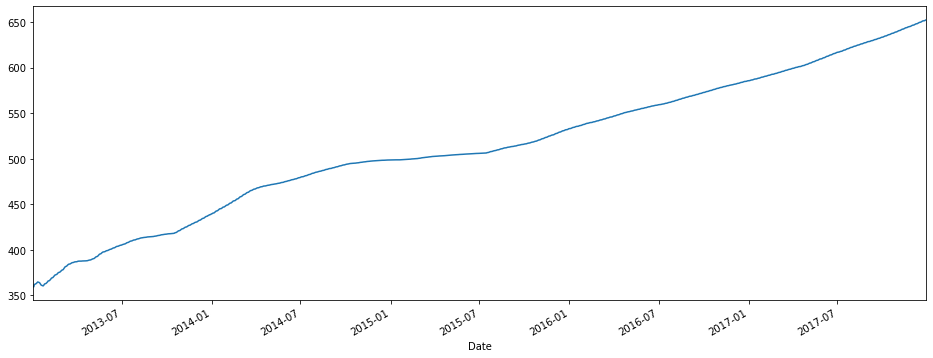

In [10]:
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [11]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

In [12]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [13]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [14]:
# Initialising the RNN
regressor = Sequential()

In [15]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))


In [16]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0368
Epoch 2/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0042
Epoch 3/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0037
Epoch 4/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0040
Epoch 5/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0042
Epoch 6/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0034
Epoch 7/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0039
Epoch 8/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0033
Epoch 9/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0032
Epoch 10/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0030
Epoch 11/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0029
Epoch 12/100
1198/1198 [==============================] - 4s 3ms/step - lo

1198/1198 [==============================] - 5s 4ms/step - loss: 0.0012
Epoch 98/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0011
Epoch 99/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0010
Epoch 100/100
1198/1198 [==============================] - 4s 4ms/step - loss: 9.5624e-04


In [17]:
dataset_test = pd.read_csv('test_set.csv',index_col="Date",parse_dates=True)

In [18]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [19]:
dataset_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600


In [20]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 125 entries, 2018-01-02 to 2018-06-29
Data columns (total 6 columns):
Open         125 non-null float64
High         125 non-null float64
Low          125 non-null float64
Close        125 non-null float64
Adj Close    125 non-null float64
Volume       125 non-null int64
dtypes: float64(5), int64(1)
memory usage: 6.8 KB


In [21]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [22]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 125 entries, 2018-01-02 to 2018-06-29
Data columns (total 1 columns):
Open    125 non-null float64
dtypes: float64(1)
memory usage: 2.0 KB


In [26]:
# Getting the predicted stock price of 2018
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 185):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [27]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 1 columns):
0    125 non-null float32
dtypes: float32(1)
memory usage: 628.0 bytes


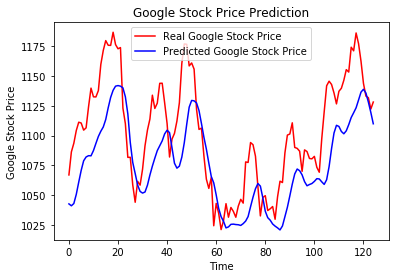

In [28]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
